## P7 Intro to Machine Learning
Author: Derek Fintel, Forensics Analyst II, D555

Contact: s542635@nwmissouri.edu

Release Date: 02/24/2025

Repository: [https://github.com/dfintel25/datafun-07-ml](https://github.com/dfintel25/datafun-07-ml)

### Introduction
This notebook covers an introductory analysis project for Machine Learning. We will leverage compiled weather information for the city of New York and use various measures to read, modify, express, and visualize the prospective changes over time. We'll conduct calculations to formulate the linear regression over time and assess predictions of the temperature found in specific years. 

### Imports

In [465]:
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns


## Part 1 - Charting a Straight Line
In Part 1, we will utilize a lambda calculation and function to construct our range and relationship of celsius to fahrenheit. We'll then plot the relationship for visual inference. 

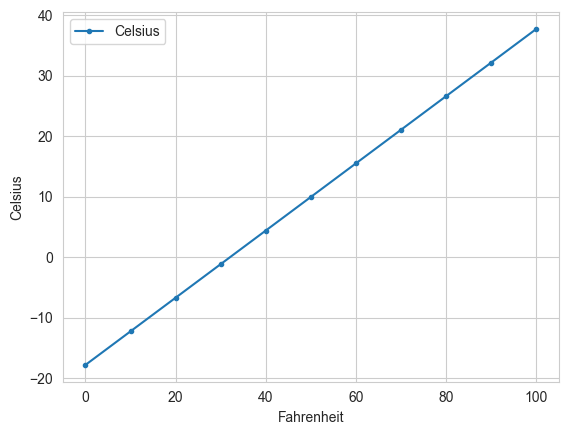

In [466]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Section 1 - Data Acquisition
For Part 2, we'll retrieve our base CSV dataset and begin to analyze its contents. We'll then review and make any adjustments to appropriately feature engineer our data. 

This script assigns "nyc_df" to the utilized CSV data.

In [ ]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

This function is pulling the initial rows or our data.

In [ ]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


This function is reading the last rows of our data.

In [ ]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning
Here we find that we should feature engineer our data slightly. You'll notice we modify the "Value" column to read as "Temperature" instead. 
Additionally we use date.floordiv(100) to reduce unnecessary decimal places. 
We then re-print the head() to assess our changes.

In [470]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics
Here we use Temperature.describe() to leverage standard statictical calculations of our data and ('display.precision', 2) to reduce the decimal places of the results.

In [471]:
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model
In this section we construct our model by establishing stats.linregress against "x" values of the "Date" field in our data and "y" values of the "Temperature" field.
We first print the Slope & Intercept and then use it to calculate the linear regression of years 1850 & 2019.  

In [472]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)

print("Slope =", linear_regression.slope)
print("Intercept =", linear_regression.intercept)
print("Slope * Year 1850 + Intercept =", linear_regression.slope * 1850 + linear_regression.intercept)
print("Slope * Year 2019 + Intercept =", linear_regression.slope * 2019 + linear_regression.intercept)

Slope = 0.014771361132966163
Intercept = 8.694993233674289
Slope * Year 1850 + Intercept = 36.022011329661694
Slope * Year 2019 + Intercept = 38.51837136113297


### Section 6 - Predict
This section houses our first "prediction" out of our model by utilizing our linear regression data against the prospective year, 2024.

In [473]:
linear_regression.slope * 2024 + linear_regression.intercept
print("Slope * Year 2024 + Intercept =", linear_regression.slope * 2024 + linear_regression.intercept)

Slope * Year 2024 + Intercept = 38.5922281667978


### Section 7 - Visualizations
In our first visualization we set the style to a "whitegrid" and can\ll our functions to plot the X-value data of Date, y-value of Temperature data and framed within the Y-limits of 10 thru 70.

Y_Limits: (10.0, 70.0)


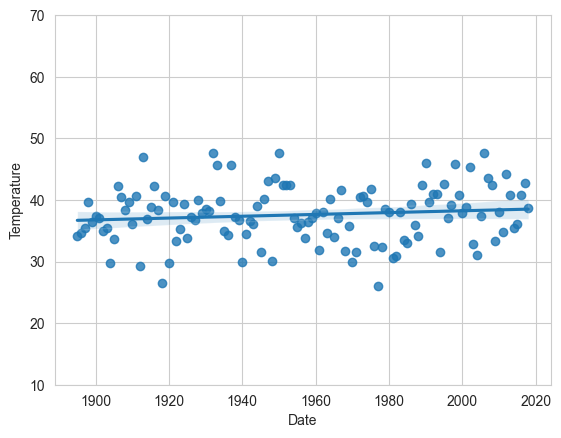

In [474]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
print("Y_Limits:", axes.set_ylim(10, 70))

## Part 3 - Prediction
In part 3, we construct our machine learning model, assign it our datasets, segment the datasets, retrieve its initial analysis and then it. We'll then query it against prospective years and finally plot the data to visualize it.  

### Section 1 - Build the Model
To build our model, we establish the training and testing parameters for X & Y values. We then reshape the X-Values of "Date" to a 2D column vector and then set the random_state to 11 to ensure reproducibility. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
     nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values, 
     random_state=11)

print("X_Train of shape =", X_train.shape)
print("X_Test of shape =", X_test.shape)

X_Train of shape = (93, 1)
X_Test of shape = (31, 1)


We are then able to calculate the linear regression of the set data. 

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

print("Linear Regression Coefficient =", linear_regression.coef_)
print(f"Linear Regression Intercept =", linear_regression.intercept_)

Linear Regression Coefficient = [0.01939167]
Linear Regression Intercept = -0.30779820252656975


### Section 2 - Test the Model
In our model testing, we utilize "predict(X_test)" to predict temperature values. We then use "expected = y_test" to compare against the actual values found. 

We'll then have our functions reference every 5th calculation for both "predicted" and "expected" fields and print them to the second decimal place.

In [ ]:
predicted = linear_regression.predict(X_test)
expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict
After training and testing our model, we're now able to query it against prospective years. We'll call upon our lambda function assign "x" to the calculation of coefficient times "x" plus the intercept.

In [ ]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

print("1890 Prediction:", predict(1890))
print("2019 Prediction:", predict(2019))
print("2024 Prediction:", predict(2024))

1890 Prediction: [36.34246432]
2019 Prediction: [38.84399018]
2024 Prediction: [38.94094855]


### Section 3 - Visualizations
Finally, we're able to employ some visualizations to help interpret the trained model outputs. 

We'll setup a scatterplot referencing the "Date" value as x, the "Temperature" values as y, the hue as the range of temperature values, the color palette as a "winter" theme and omit a legend.

We then set the framing limits to 10 thru 70 of the y-field, assign the date max/min values to x, and the prediction calculations to y. We'll complete the view by applying our slope calculation to the trend line. 

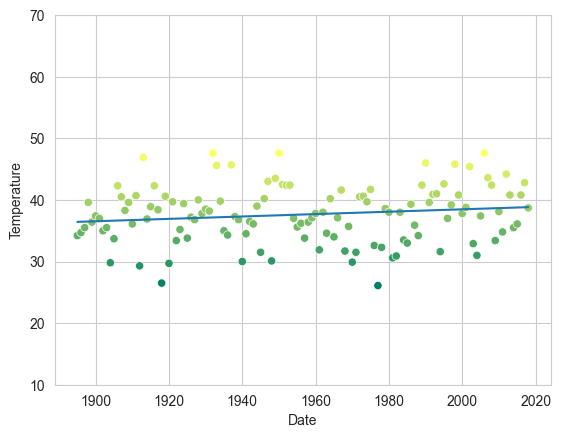

In [ ]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature',
     hue='Temperature', palette='summer', legend=False)

axes.set_ylim(10, 70)
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)
line = plt.plot(x, y)

## Part 4 - Summary
In closing of this analysis, we'll provide some observations of the two methods used and potential pro's & con's. 

For our intiial prediction (Part 2, Section 6), we leveraged a simple and static linear regression calcuation to predict the temperature in 2024, which read as: 38.59.

We then built, trained, and tested a machine learning model to survey greater capabilities towards prediction. We fed the model the same base dataset but trained it to calculate the results over a multiplicity of repetitions and derived it's linear regression findings. In our trained model, it read 2024 as: 38.94.

Here is a short pro's & con's of the respective approaches:

Simple Linear Regression Calculation:

    Pro's: Quick and easy if only needing a minimal amount of results.

    Con's: May not be suitable for scaled calculations.

Trained Machine Learning Model: 

    Pro's: Potentially robust and scalable calculation capabilities.

    Con's: Can be trained in error or overtained and not accurate. 
    

Thank you for taking the time to review this project and analysis of approaches. Please connect with me should you have any questions, recommendations, or commissionable interests. 

Best,

Derek Fintel